In [1]:
from pycalphad.tests.datasets import *
from pycalphad.core.solver import InteriorPointSolver
from pycalphad import equilibrium, Database, variables as v

ALFE_DBF = Database(ALFE_TDB)
ISSUE43_DBF = Database(ISSUE43_TDB)

class ProblemSaver(InteriorPointSolver):
    saved_problem = [None]
    def solve(self, prob):
        self.saved_problem[0] = prob
        self.verbose = True
        return super(ProblemSaver, self).solve(prob)

#eq = equilibrium(ALFE_DBF, ['AL', 'FE', 'VA'], ['FCC_A1', 'AL13FE4'],
#                 {v.MU('FE'): -123110, v.T: 300, v.P: 1e5}, solver=ProblemSaver())
eq = equilibrium(ISSUE43_DBF, ['AL', 'NI', 'CR', 'VA'], ['FCC_A1', 'GAMMA_PRIME'],
                     {v.MU('AL'): -135620.9960449, v.MU('CR'): -47269.29002414, v.T: 1273, v.P: 101325},
                     solver=ProblemSaver())

Trying to improve poor solution
Chemical Potentials [-135620.99605431  -47269.29003355  -92304.23685006]
[0. 0. 0. 0. 0. 0. 0. 0.]
[1.00000000e+00 1.01325000e+05 1.27300000e+03 1.96247274e-01
 3.89967388e-01 4.13785338e-01 1.00000000e+00 1.00000000e+00]
Status: 0 b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'


In [2]:
import numpy as np
soln = np.array(
[1.00000000e+00, 1.01325000e+05, 1.27300000e+03, 1.96247274e-01,
 3.89967388e-01, 4.13785338e-01, 1.00000000e+00, 1.00000000e+00]
)

In [8]:
cons_idx = -1
selected_index = 5
step = 1e-5
inputs = np.arange(1e-12,1-1e-12,step)
obj = np.zeros_like(inputs)
grad = np.zeros_like(inputs)
error = np.zeros_like(inputs)
for idx, val in enumerate(inputs):
    copy_of_soln = np.array(soln)
    copy_of_soln[selected_index] = val
    obj[idx] = ProblemSaver.saved_problem[0].constraints(copy_of_soln)[cons_idx]
    grad[idx] = ProblemSaver.saved_problem[0].jacobian(copy_of_soln)[cons_idx,selected_index]
error = np.abs(np.gradient(obj, step) - grad)

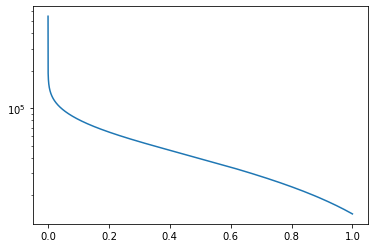

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.semilogy(inputs, error)
#plt.ylim((1e-13,1e-6))

In [5]:
error

array([4.59941501e+05, 2.47684104e+05, 2.38553247e+05, ...,
       4.34656383e+02, 4.35468579e+02, 4.35684528e+02])